<a href="https://colab.research.google.com/github/HaniaRangel/SIM_MAT/blob/main/Tarea_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea - Ajuste de curvas

### *Hania Alexa Rangel Aguilar* | *746409*

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
import scipy.optimize as opt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [77]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 27$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [78]:
y=data
x=np.arange(len(y)) # <- lista 0-26

In [79]:
def fhat(b,x):
    X=np.array([x**i for i in range(len(b))]).T
    return X@b

In [80]:
def error_3(b,x,y):
    return np.sum((y-fhat(b,x))**2)

In [81]:
# Minimización del error
b_inicial_1=np.random.rand(2)
sol_1=opt.minimize(error_3, b_inicial_1, args=(x, y))
b_opt_1=sol_1.x

b_inicial_2=np.random.rand(3)
sol_2=opt.minimize(error_3, b_inicial_2, args=(x, y))
b_opt_2=sol_2.x

b_inicial_3=np.random.rand(4)
sol_3=opt.minimize(error_3, b_inicial_3, args=(x, y))
b_opt_3=sol_3.x

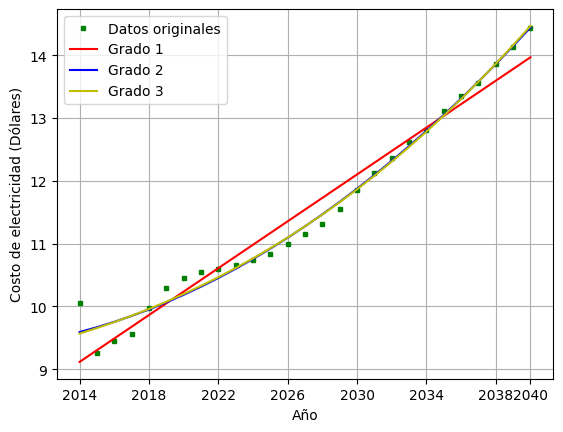

In [82]:
# Gráfico
plt.plot(x, y, 'gs', ms=3, label='Datos originales')
yfit_1=fhat(b_opt_1, x)
yfit_2=fhat(b_opt_2, x)
yfit_3=fhat(b_opt_3, x)
plt.plot(x, yfit_1, 'r-', label='Grado 1')
plt.plot(x, yfit_2, 'b-', label='Grado 2')
plt.plot(x, yfit_3, 'y-', label='Grado 3')

# etiquetas
etiquetas_x=[2014, 2018, 2022, 2026, 2030, 2034, 2038, 2040]
posiciones_x=[a-2014 for a in etiquetas_x]
plt.xticks(posiciones_x, etiquetas_x)

plt.xlabel('Año')
plt.ylabel('Costo de electricidad (Dólares)')
plt.legend()
plt.grid()

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [83]:
data = pd.read_csv('population_data.csv')

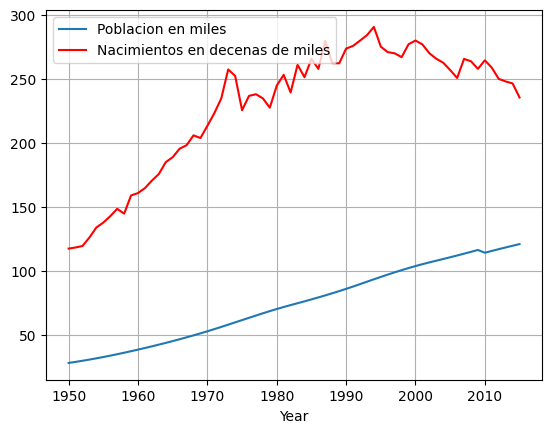

In [84]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/10000,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

---

In [85]:
# variable independiente
x_orig=data.iloc[:,0].values
x=x_orig-x_orig[0]

In [101]:
# y = población
y=data.iloc[:,1].values

In [87]:
def fhat(b,x):
    X=np.array([x**i for i in range(len(b))]).T
    return X@b

In [88]:
def error_3(b,x,y):
    return np.sum((y-fhat(b,x))**2)

In [89]:
# Minimización del error
b_inicial_1=np.random.rand(2)
sol_1=opt.minimize(error_3, b_inicial_1, args=(x, y))
b_opt_1=sol_1.x

b_inicial_2=np.random.rand(3)
sol_2=opt.minimize(error_3, b_inicial_2, args=(x, y))
b_opt_2=sol_2.x

b_inicial_3=np.random.rand(4)
sol_3=opt.minimize(error_3, b_inicial_3, args=(x, y))
b_opt_3=sol_3.x

In [90]:
# Error acumulado
error_ac=[sol_1.fun, sol_2.fun, sol_3.fun]
grados=[1,2,3]

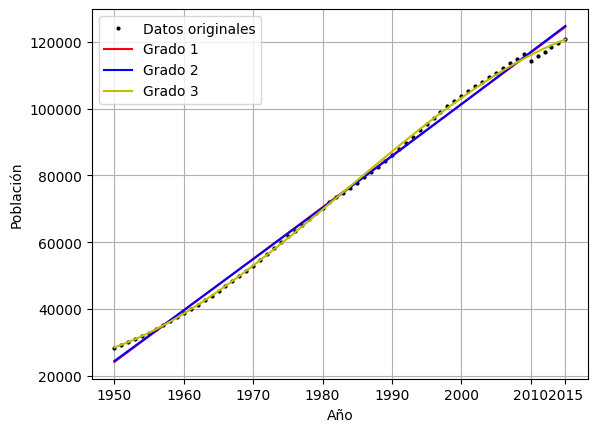

In [91]:
# Gráfico
plt.plot(x, y, 'ko', ms=2, label='Datos originales')
yfit_1=fhat(b_opt_1, x)
yfit_2=fhat(b_opt_2, x)
yfit_3=fhat(b_opt_3, x)
plt.plot(x, yfit_1, 'r-', label='Grado 1')
plt.plot(x, yfit_2, 'b-', label='Grado 2')
plt.plot(x, yfit_3, 'y-', label='Grado 3')

# etiquetas
etiquetas_x=[1950, 1960, 1970, 1980, 1990, 2000, 2010, 2015]
posiciones_x=[a-1950 for a in etiquetas_x]
plt.xticks(posiciones_x, etiquetas_x)

plt.xlabel('Año')
plt.ylabel('Población')
plt.legend()
plt.grid()

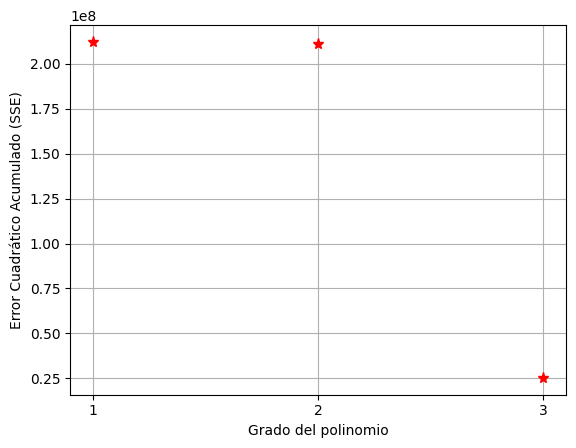

In [92]:
# Gráfica error
plt.plot(grados, error_ac, 'r*', ms=8)
plt.xticks(grados)
plt.xlabel('Grado del polinomio')
plt.ylabel('Error Cuadrático Acumulado (SSE)')
plt.grid()

**Ejercicio 2: y = nacimientos**

In [103]:
y=data.iloc[:,2].values

In [104]:
# Minimización del error
b_inicial_1=np.random.rand(2)
sol_1=opt.minimize(error_3, b_inicial_1, args=(x, y))
b_opt_1=sol_1.x

b_inicial_2=np.random.rand(3)
sol_2=opt.minimize(error_3, b_inicial_2, args=(x, y))
b_opt_2=sol_2.x

b_inicial_3=np.random.rand(4)
sol_3=opt.minimize(error_3, b_inicial_3, args=(x, y))
b_opt_3=sol_3.x

In [105]:
# Error acumulado
error_ac=[sol_1.fun, sol_2.fun, sol_3.fun]
grados=[1,2,3]

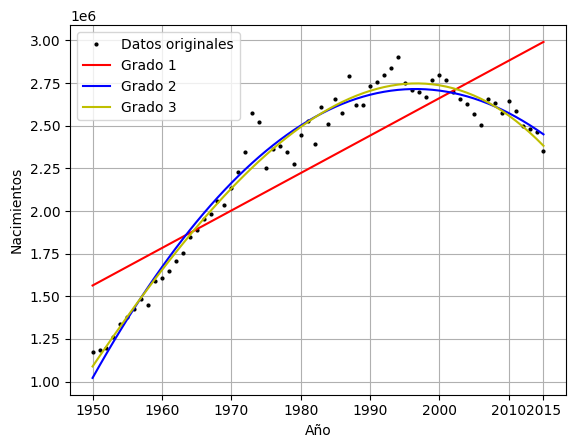

In [106]:
# Gráfico
plt.plot(x, y, 'ko', ms=2, label='Datos originales')
yfit_1=fhat(b_opt_1, x)
yfit_2=fhat(b_opt_2, x)
yfit_3=fhat(b_opt_3, x)
plt.plot(x, yfit_1, 'r-', label='Grado 1')
plt.plot(x, yfit_2, 'b-', label='Grado 2')
plt.plot(x, yfit_3, 'y-', label='Grado 3')

# etiquetas
etiquetas_x=[1950, 1960, 1970, 1980, 1990, 2000, 2010, 2015]
posiciones_x=[a-1950 for a in etiquetas_x]
plt.xticks(posiciones_x, etiquetas_x)

plt.xlabel('Año')
plt.ylabel('Nacimientos')
plt.legend()
plt.grid()

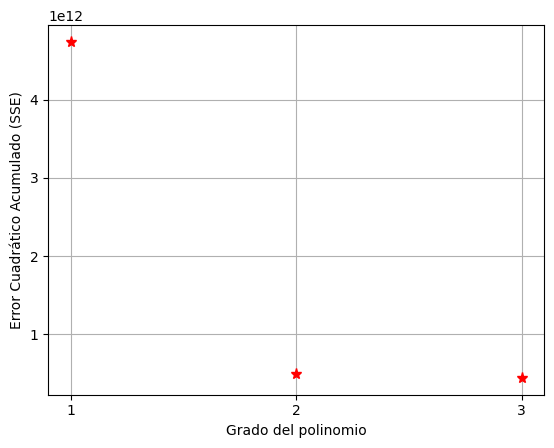

In [107]:
# Gráfica error
plt.plot(grados, error_ac, 'r*', ms=8)
plt.xticks(grados)
plt.xlabel('Grado del polinomio')
plt.ylabel('Error Cuadrático Acumulado (SSE)')
plt.grid()